In [ ]:
from google.colab import files
uploaded = files.upload()

Saving resultats.csv to resultats (1).csv


In [ ]:
import pandas as pd
data = pd.read_csv('resultats.csv')

In [ ]:
# Sélectionner les colonnes pertinentes (texte des tweets)
data = data[['col4']].dropna()

# Afficher les premières lignes
data.head()

,col4
0,@KariDebbink @Vineet321 The Frieman Scary Scal...
1,because of the coronavirus in china citizens a...
2,Washington Man Is 1st in US to Catch Newly Dis...
3,Afrinews Report: Cathay says cabin crew can we...
4,Frustration over face masks as coronavirus cas...


In [ ]:
data.shape

(6034, 1)

In [ ]:
import re
from transformers import pipeline

# Création d'une fonction de prétraitement
def pretraiter_tweet(tweet):
    # Supprission des hashtags
    tweet = re.sub(r'#\w+', '', tweet)
    #remplacer la colonne avec la vraie colonne de dataset
    # Conversion de tweets en minuscules
    tweet = tweet.lower()
    # Suppression des caractères spéciaux
    tweet = re.sub(r'[^a-zA-Z0-9\s]', '', tweet)
    # Suppression des espaces supplémentaires
    tweet = tweet.strip()
    return tweet

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install --q transformers
!pip install --q openai
!pip install --q openai==0.28

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 2.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download necessary NLTK data packages
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Download the missing 'punkt_tab' data package

# Fonction de nettoyage du texte
def clean_text(text):
    text = text.lower()  # Convertir en minuscules
    text = re.sub(r'\d+', '', text)  # Supprimer les chiffres
    text = text.translate(str.maketrans('', '', string.punctuation))  # Supprimer la ponctuation
    text = re.sub(r'http\S+', '', text)  # Supprimer les liens URL

    # Supprimer les mots vides
    stop_words = set(stopwords.words('french'))
    words = word_tokenize(text)
    text = ' '.join([word for word in words if word.lower() not in stop_words])

    return text

# Nettoyer les hashtags dans la colonne 'col4'
data['col4'] = data['col4'].str.replace(r'#\w+', '')

# Appliquer la fonction de nettoyage sur la colonne 'col4'
data['tweets'] = data['col4'].apply(clean_text)

# Afficher les premières lignes du dataset après nettoyage
data.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,col4,tweets
0,@KariDebbink @Vineet321 The Frieman Scary Scal...,karidebbink vineet the frieman scary scale mak...
1,because of the coronavirus in china citizens a...,because of the coronavirus in china citizens a...
2,Washington Man Is 1st in US to Catch Newly Dis...,washington man is st in us to catch newly disc...
3,Afrinews Report: Cathay says cabin crew can we...,afrinews report cathay says cabin crew can wea...
4,Frustration over face masks as coronavirus cas...,frustration over face masks coronavirus cases ...


In [ ]:
data.head(50)

,col4,tweets
0,@KariDebbink @Vineet321 The Frieman Scary Scal...,karidebbink vineet the frieman scary scale mak...
1,because of the coronavirus in china citizens a...,because of the coronavirus in china citizens a...
2,Washington Man Is 1st in US to Catch Newly Dis...,washington man is st in us to catch newly disc...
3,Afrinews Report: Cathay says cabin crew can we...,afrinews report cathay says cabin crew can wea...
4,Frustration over face masks as coronavirus cas...,frustration over face masks coronavirus cases ...
5,China s e-commerce players look to ease new co...,china ecommerce players look to ease new coron...
6,Dont matter the mask is black or white. The ma...,dont matter the mask is black or white the mas...
7,Cathay to let crew wear masks on all flights d...,cathay to let crew wear masks all flights due ...
8,Coronavirus: In last flight from Wuhan everyon...,coronavirus in last flight from wuhan everyone...
9,Wearing mask outside is double purpose now... ...,wearing mask outside is double purpose now for...


In [ ]:
# Suppression de la colonne 'colonne_a_supprimer'
data = data.drop('col4', axis=1)

In [ ]:
import re
from transformers import pipeline

# Création d'une fonction de prétraitement
def pretraiter_tweet(tweet):
    # Supprission des hashtags
    tweet = re.sub(r'#\w+', '', tweet) # Changed from col4 to tweet
    #remplacer la colonne avec la vraie colonne de dataset
    # Conversion de tweets en minuscules
    tweet = tweet.lower()  # Changed from col4 to tweet
    # Suppression des caractères spéciaux
    tweet = re.sub(r'[^a-zA-Z0-9\s]', '', tweet)  # Changed from col4 to tweet
    # Suppression des espaces supplémentaires
    tweet = tweet.strip()  # Changed from col4 to tweet
    return tweet

In [ ]:
# Application de la fonction de prétraitement à tous les tweets
data['tweet'] = data['tweets'].apply(pretraiter_tweet)

In [ ]:
import re
from transformers import pipeline

# Création d'une fonction de prétraitement
def pretraiter_tweet(tweet):
    # Supprission des hashtags
    tweet = re.sub(r'#\w+', '', tweet) # Use 'tweet' instead of 'col4'
    #remplacer la colonne avec la vraie colonne de dataset
    # Conversion de tweets en minuscules
    tweet = tweet.lower() # Use 'tweet' instead of 'col4'
    # Suppression des caractères spéciaux
    tweet = re.sub(r'[^a-zA-Z0-9\s]', '', tweet) # Use 'tweet' instead of 'col4'
    # Suppression des espaces supplémentaires
    tweet = tweet.strip() # Use 'tweet' instead of 'col4'
    return tweet # Return the modified 'tweet'

In [ ]:
lots_de_tweets = [data['tweet'][i:i + 50] for i in range(0, len(data['tweet']), 50)]
# Use len(df['tweet']) to get the length of the 'tweet' column in the DataFrame.

In [ ]:
# Initialisation dans le pipeline d'analyse de sentiment
analyse_sentiment = pipeline('sentiment-analysis')

resultats = []


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
# Nous Analysons chaque lot de 50 tweets
for i, lot in enumerate(lots_de_tweets):
    print(f"Analyse du lot {i+1}/{len(lots_de_tweets)}")

Analyse du lot 1/121
Analyse du lot 2/121
Analyse du lot 3/121
Analyse du lot 4/121
Analyse du lot 5/121
Analyse du lot 6/121
Analyse du lot 7/121
Analyse du lot 8/121
Analyse du lot 9/121
Analyse du lot 10/121
Analyse du lot 11/121
Analyse du lot 12/121
Analyse du lot 13/121
Analyse du lot 14/121
Analyse du lot 15/121
Analyse du lot 16/121
Analyse du lot 17/121
Analyse du lot 18/121
Analyse du lot 19/121
Analyse du lot 20/121
Analyse du lot 21/121
Analyse du lot 22/121
Analyse du lot 23/121
Analyse du lot 24/121
Analyse du lot 25/121
Analyse du lot 26/121
Analyse du lot 27/121
Analyse du lot 28/121
Analyse du lot 29/121
Analyse du lot 30/121
Analyse du lot 31/121
Analyse du lot 32/121
Analyse du lot 33/121
Analyse du lot 34/121
Analyse du lot 35/121
Analyse du lot 36/121
Analyse du lot 37/121
Analyse du lot 38/121
Analyse du lot 39/121
Analyse du lot 40/121
Analyse du lot 41/121
Analyse du lot 42/121
Analyse du lot 43/121
Analyse du lot 44/121
Analyse du lot 45/121
Analyse du lot 46/1

In [ ]:
import pandas as pd
from transformers import pipeline

# Initialisation du pipeline d'analyse de sentiment
analyse_sentiment = pipeline('sentiment-analysis')

# Fonction pour mapper les labels aux sentiments
def mapper_sentiment(label, score):
    if label == 'POSITIVE' and score >= 0.7:  # Seuil de confiance pour 'positif'
        return 'Positif'
    elif label == 'NEGATIVE' and score >= 0.7:  # Seuil de confiance pour 'négatif'
        return 'Négatif'
    else:
        return 'Neutre'  # Tout le reste est considéré comme 'neutre'

# ... (Votre code pour lots_de_tweets) ...

# Nous Analysons chaque lot de 50 tweets
for i, lot in enumerate(lots_de_tweets):
    print(f"Analyse du lot {i+1}/{len(lots_de_tweets)}")
    # Nous Réinitialisons le modèle (si nécessaire)
    # analyse_sentiment.model = analyse_sentiment.model.from_pretrained('distilbert-base-uncased')

    # Analyse des tweets du lot actuel
    for tweet in lot:
        resultat = analyse_sentiment(tweet)[0]
        sentiment = mapper_sentiment(resultat['label'], resultat['score'])
        # Include the score in the resultats list
        resultats.append((tweet, sentiment, resultat['score']))

    # Sauvegarde des résultats dans un fichier
    resultats_df = pd.DataFrame(resultats, columns=['Tweet', 'Sentiment', 'score'])
    resultats_df.to_csv(f'resultats_lot_{i+1}.csv', index=False)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Analyse du lot 1/121
Analyse du lot 2/121
Analyse du lot 3/121
Analyse du lot 4/121
Analyse du lot 5/121
Analyse du lot 6/121
Analyse du lot 7/121
Analyse du lot 8/121
Analyse du lot 9/121
Analyse du lot 10/121
Analyse du lot 11/121
Analyse du lot 12/121
Analyse du lot 13/121
Analyse du lot 14/121
Analyse du lot 15/121
Analyse du lot 16/121
Analyse du lot 17/121
Analyse du lot 18/121
Analyse du lot 19/121
Analyse du lot 20/121
Analyse du lot 21/121
Analyse du lot 22/121
Analyse du lot 23/121
Analyse du lot 24/121
Analyse du lot 25/121
Analyse du lot 26/121
Analyse du lot 27/121
Analyse du lot 28/121
Analyse du lot 29/121
Analyse du lot 30/121
Analyse du lot 31/121
Analyse du lot 32/121
Analyse du lot 33/121
Analyse du lot 34/121
Analyse du lot 35/121
Analyse du lot 36/121
Analyse du lot 37/121
Analyse du lot 38/121
Analyse du lot 39/121
Analyse du lot 40/121
Analyse du lot 41/121
Analyse du lot 42/121
Analyse du lot 43/121
Analyse du lot 44/121
Analyse du lot 45/121
Analyse du lot 46/1

In [ ]:
data.head(50)

,Tweet,Sentiment,score
0,karidebbink vineet the frieman scary scale mak...,Négatif,0.900683
1,because of the coronavirus in china citizens a...,Négatif,0.967480
2,washington man is st in us to catch newly disc...,Négatif,0.991505
3,afrinews report cathay says cabin crew can wea...,Négatif,0.995786
4,frustration over face masks coronavirus cases ...,Négatif,0.998985
5,china ecommerce players look to ease new coron...,Négatif,0.987356
6,dont matter the mask is black or white the mas...,Négatif,0.995774
7,cathay to let crew wear masks all flights due ...,Négatif,0.995573
8,coronavirus in last flight from wuhan everyone...,Négatif,0.993303
9,wearing mask outside is double purpose now for...,Négatif,0.995527


In [ ]:
resultats_df['Sentiment'].value_counts()

,count
Sentiment,
Négatif,5295
Positif,560
Neutre,179


In [ ]:
resultats_df['score'].value_counts()

,count
score,
0.799588,50
0.972935,21
0.986212,21
0.978772,20
0.996961,14
...,...
0.991223,1
0.995015,1
0.923335,1


In [ ]:
resultats_df.drop(columns=['score'], inplace=True)

In [ ]:
from google.colab import files
import pandas as pd

# Save the DataFrame to a CSV file
resultats_df.to_csv('resultats.csv', index=False)  # You can change 'resultats.csv' to your desired file name

# Download the file
files.download('resultats.csv')  # Pass the file name as a string

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
from sklearn.naive_bayes import MultinomialNB
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.preprocessing.sequence import pad_sequences
import numpy as np

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
# Remplacer les sentiments par des entiers
data['Sentiment'] = data['Sentiment'].map({'Positif': 1, 'Neutre': 2, 'Négatif': 0})

# Séparer les données en features et labels
X = data['Tweet']
y = data['Sentiment']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Séparation des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

tfidf = TfidfVectorizer(max_features=6034)
X_train_tfidf = tfidf.fit_transform(X_train).toarray()
X_test_tfidf = tfidf.transform(X_test).toarray()

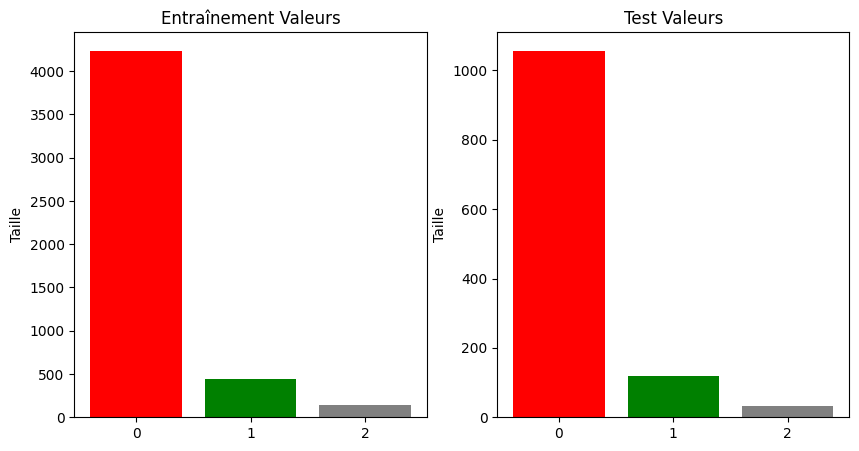

In [ ]:
import matplotlib.pyplot as plt

# Tailles des ensembles d'entraînement et de test
# sizes_train should have 3 values, one for each label in 'labels'
sizes_train = [len(y_train[y_train == 0]), len(y_train[y_train == 1]), len(y_train[y_train == 2])]
sizes_test = [len(y_test[y_test == 0]), len(y_test[y_test == 1]), len(y_test[y_test == 2])]

# Labels des barres
labels = ['0', '1', '2']

# Création des histogrammes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plotting the bars
ax1.bar(labels, sizes_train, color=['red', 'green', 'gray'])
ax1.set_title('Entraînement Valeurs')
ax1.set_ylabel('Taille')

ax2.bar(labels, sizes_test, color=['red', 'green', 'gray'])
ax2.set_title('Test Valeurs')
ax2.set_ylabel('Taille')

plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

k_values = range(1, 10)
scores = []

for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn_classifier, X_train_tfidf, y_train, cv=5)
    scores.append(score.mean())

best_k = k_values[scores.index(max(scores))]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Remove .toarray() as X_train_tfidf is already a dense NumPy array
X_train_scaled = scaler.fit_transform(X_train_tfidf)
# Remove .toarray() as X_test_tfidf is already a dense NumPy array
X_test_scaled = scaler.transform(X_test_tfidf)

knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
knn_classifier.fit(X_train_scaled, y_train)
y_pred_knn_test = knn_classifier.predict(X_test_scaled)

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=best_k, metric='manhattan')  # par exemple

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_knn_test))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1057
           1       0.80      0.10      0.18       118
           2       0.50      0.03      0.06        32

    accuracy                           0.88      1207
   macro avg       0.73      0.38      0.39      1207
weighted avg       0.87      0.88      0.84      1207



In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

knn_classifier.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier(metric='manhattan', n_neighbors=4)

In [ ]:
# ipython-input-78-30e0a9b904a6
knn_classifier = KNeighborsClassifier(n_neighbors=best_k, metric='manhattan')  # par exemple

# Add the following line to fit the model again after changing the metric
knn_classifier.fit(X_train_scaled, y_train) # Fit the classifier with the scaled training data

KNeighborsClassifier(metric='manhattan', n_neighbors=4)

In [ ]:
from sklearn.model_selection import GridSearchCV # Importing the GridSearchCV class
from sklearn.neighbors import KNeighborsClassifier # Importing KNeighborsClassifier for instantiation

hyperparametres = {'n_neighbors': range(1,10), 'weights': ['uniform', 'distance']}

# Instantiate KNeighborsClassifier without calling it
knn_classifier = KNeighborsClassifier()

grid = GridSearchCV(knn_classifier, hyperparametres, cv=10, scoring='accuracy')
grid.fit(X_train_tfidf, y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 10),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
grid.best_params_

{'n_neighbors': 9, 'weights': 'distance'}

In [ ]:
modele = grid.best_estimator_

In [ ]:
modele.fit(X_train_tfidf, y_train)

KNeighborsClassifier(n_neighbors=9, weights='distance')

In [ ]:
y_pred_knn_test = modele.predict(X_test_tfidf)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_knn_test)

0.8864954432477217

In [ ]:
SVM = svm.SVC()
SVM.fit(X_train_tfidf, y_train)

SVC()

In [ ]:
!pip install scikit-learn
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import SVC
# Importing SelectKBest from sklearn.feature_selection
from sklearn.feature_selection import SelectKBest, f_classif

preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=10))
# Renamed SVM to model_svm to avoid conflicts and make it clear
model_svm = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))

In [ ]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

def evaluation(model):
  model.fit(X_train_tfidf, y_train)
  ypred = model.predict(X_test_tfidf)

  print(confusion_matrix(y_test, ypred))
  print(classification_report(y_test, y_pred))

  N, train_score, val_score = learning_curve(model, X_train_tfidf, y_train, cv=4,
                                             scoring='f1', train_sizes=np.linspace(0.1, 1, 10))

  plt.figure(figsize=(12, 8))
  plt.plot(N, train_score.mean(axis=1), label='train score')
  plt.plot(N, val_score.mean(axis=1), label='validation score')
  plt.legend()
evaluation(model_svm)

In [ ]:
grid.best_params

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
SVM

In [ ]:
grid = GridSearchCV(SVM, hyper_params, scoring='recall', cv=4)
grid.fit(X_train, y_train)

print(grid.best_params_)
y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
hyper_params = {'svc__gamma':[1e-3, 1e-4],
                'svc__C':[1, 10, 100, 1000]
                'pipeline__polynomialfeatures__degree':[2, 3, 4],
                'pipeline__selectkbest_k': range(4, 100)}

In [ ]:
evaluation(grid.best_estimator_)

In [ ]:
grid = R

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_svm_test))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1263
           1       0.74      0.19      0.30       193
           2       0.27      0.07      0.11        55

    accuracy                           0.85      1511
   macro avg       0.62      0.42      0.45      1511
weighted avg       0.82      0.85      0.81      1511



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'num_leaves': [31, 50, 100],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}

grid_search = GridSearchCV(lgb.LGBMClassifier(), param_grid, cv=3, scoring='f1_macro')
grid_search.fit(X_train_vec.astype(np.float32), y_train)

best_model = grid_search.best_estimator_

In [ ]:
lgb_classifier = lgb.LGBMClassifier(class_weight='balanced')
lgb_classifier.fit(X_train_vec.astype(np.float32), y_train)

In [ ]:
from sklearn.metrics import classification_report

y_pred_lgb_test = lgb_classifier.predict(X_test_vec.astype(np.float32))
print(classification_report(y_test, y_pred_lgb_test))

In [ ]:
!pip install keras
!pip install tensorflow
from tensorflow import keras

In [ ]:
# CNN Classifier
# Prétraitement pour le CNN
max_words = 2000
max_len = 120
tokenizer = keras.preprocessing.text.Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Création du modèle CNN
cnn_model = Sequential()
cnn_model.add(Embedding(max_words, 128, input_length=max_len))
cnn_model.add(SpatialDropout1D(0.2))
cnn_model.add(LSTM(100))
cnn_model.add(Dense(3, activation='softmax'))  # 3 classes

cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn_model.fit(X_train_pad, y_train, epochs=5, batch_size=64)

# Prédictions CNN
y_pred_cnn_train = np.argmax(cnn_model.predict(X_train_pad), axis=-1)
y_pred_cnn_test = np.argmax(cnn_model.predict(X_test_pad), axis=-1)


In [ ]:
# Define target names based on your sentiment mapping
target_names = ['Négatif', 'Positif', 'Neutre']  # Order to match your 0, 1, 2 mapping

# Calculer et afficher le rapport de classification
report = classification_report(y_test, y_pred_cnn_test, target_names=target_names, output_dict=True)
print(classification_report(y_test, y_pred_cnn_test, target_names=target_names))
